# Regression &ndash; challenging example two

In part one of regression's challenging example we considered California housing data and two independent variables. Here we continue studying that example by adding a third independent variable. We will study whether coefficient of determination (R squared) is thus improved. This note can be read independently from part one.

In [1]:
## Import necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### In this example we use data of California house prices from the sklearn library.

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### housing data includes already named parts

housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
### Description of the data.

print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
### Read the data in a dataframe.

### features

df = pd.DataFrame(housing.data, columns = housing.feature_names)

### target

df['MEDV'] = housing.target

### Peek at the data

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
### It is always worth checking if there are missing values in the data.

df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

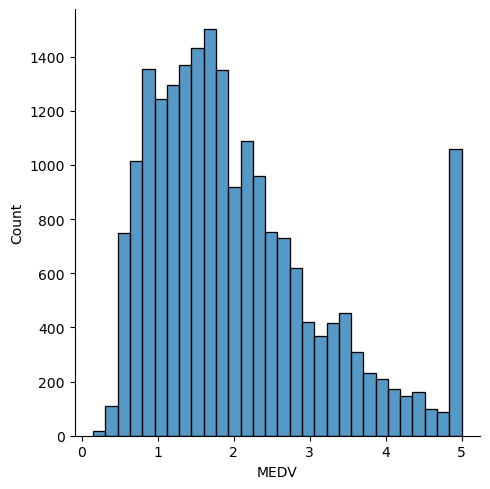

In [6]:
### distribution of the target variable (dependent variable, forecast variable)

sns.displot(df['MEDV'], bins = 30)

<Axes: >

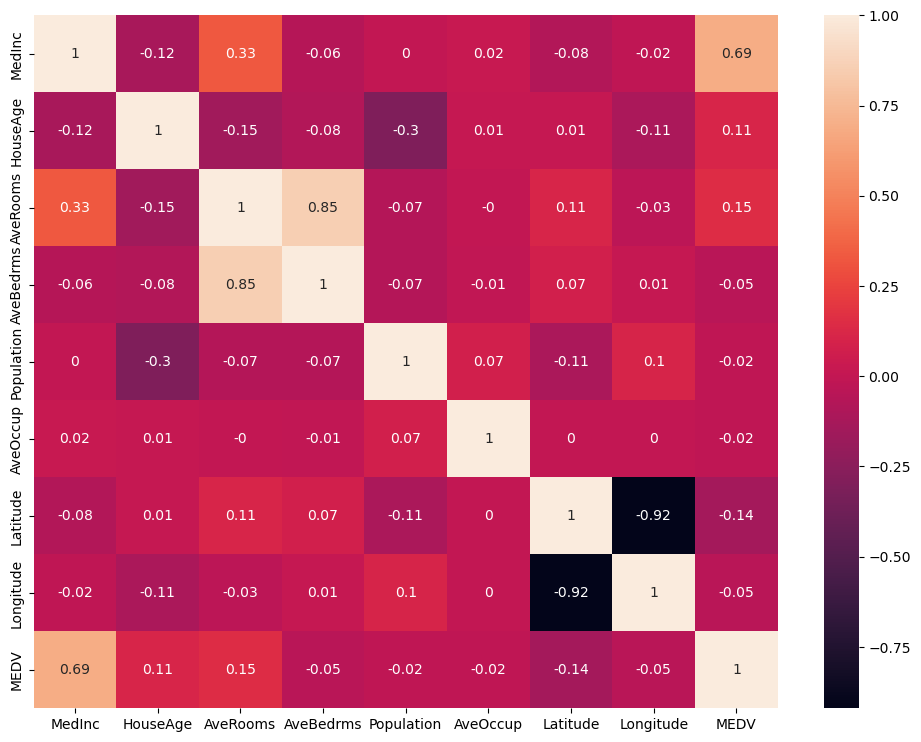

In [7]:
### Correlation coefficients in two decimals.

correlation_matrix = df.corr().round(2)

### Create a figure where the correlation matrix fits into.

plt.figure(figsize = (12,9))

### Coloring formatting is done by the heatmap function of the seaborn library.

sns.heatmap(data = correlation_matrix, annot = True)

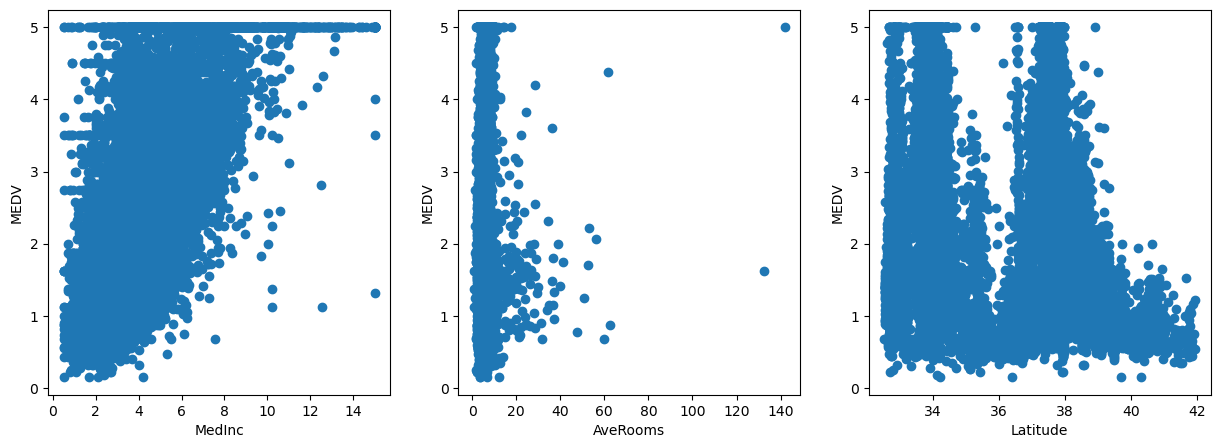

In [8]:
### We now choose three variables LSTAT, RM and PTRATIO with the highest correlation coefficients with the dependent variable MEDV.

features = ['MedInc', 'AveRooms', 'Latitude']

target = df['MEDV']

### Add a figure big enough for three scatter charts.

plt.figure(figsize = (15,5))

### Using the function enumerate() we can look through a list and for each element return both its running number (starting from zero) and the corresponding value.

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(df[feature], target)
    plt.xlabel(feature)
    plt.ylabel('MEDV')

In [9]:
### Prepare the data for regression analysis.

### feature matrix

X = df[features]

### target variable

y = target

In [10]:
### Split the data between training data and test data (20 % of the data).

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

### Parameter random_state ensures that in each round there is the similar division between the training and test data.

### Check the sizes of emerged datas.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 3)
(4128, 3)
(16512,)
(4128,)


In [11]:
### Fitting regression model into the training data.

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [12]:
### Coefficients

print('Coefficients: ', model.coef_)

Coefficients:  [ 0.42609309 -0.02970196 -0.0443332 ]


In [13]:
### Intercept

print('Intercept: ', model.intercept_)

Intercept:  2.156736372295833


In [14]:
### Statistics related to the reliability of the model.

from sklearn.metrics import mean_absolute_error

y_train_predict = model.predict(X_train)

### Mean of absolute errors

mae = (mean_absolute_error(y_train, y_train_predict))

### R squared

r2 = model.score(X_train, y_train)

print('Suitability of the model for the training data')
print("---------------------------------------------")
print('Mean absolute error: {}'.format(mae))
print('Coefficient of determination: {}'.format(r2))
print("\n")

y_test_predict = model.predict(X_test)
mae = (mean_absolute_error(y_test, y_test_predict))
r2 = model.score(X_test, y_test)

print('Suitability of the model for the test data')
print('------------------------------------------')
print('Mean absolute error: {}'.format(mae))
print('Coefficient of determination: {}'.format(r2))

Suitability of the model for the training data
---------------------------------------------
Mean absolute error: 0.6138774901350019
Coefficient of determination: 0.4822870285735621


Suitability of the model for the test data
------------------------------------------
Mean absolute error: 0.6194485873325766
Coefficient of determination: 0.4985073648213547


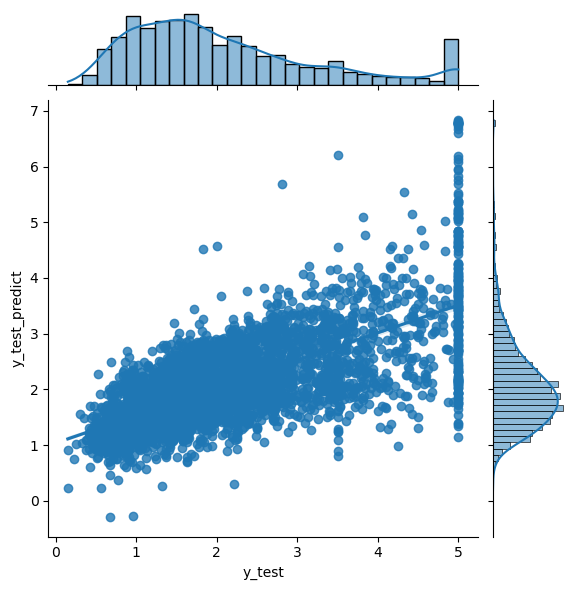

In [15]:
### Compare observations in the test data and forecast of the model.

### Create a dataframe

test = pd.DataFrame()
test['y_test'] = y_test
test['y_test_predict'] = y_test_predict

### View the result as jointplot of the seaborn library.

sns.jointplot(data=test, x = 'y_test', y = 'y_test_predict', kind = 'reg')

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>

In [16]:
import datetime
print(f'Last modified {datetime.datetime.now():%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2023-10-22 02:15 by Juha Nurmonen
